# core

> Fill in a module description here

In [1]:
#| default_exp core

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| export
def foo(): pass

In [4]:
#| hide
import nbdev; nbdev.nbdev_export()

##Plotting graphs

> various plotting techniques

In [5]:
from matplotlib import pyplot as plt

In [6]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]


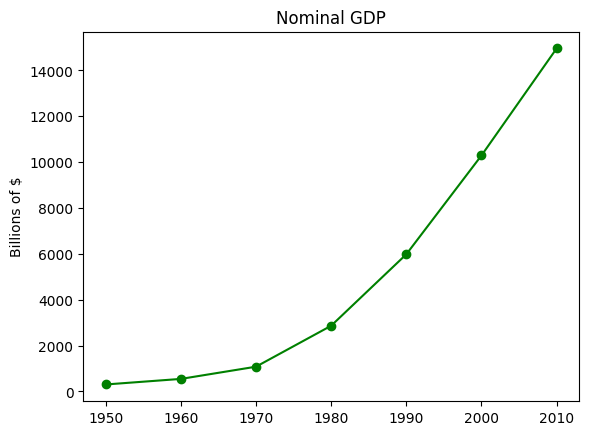

In [7]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

In [4]:
import altair as alt
from vega_datasets import data

In [9]:
source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [10]:
source = data.iowa_electricity()

alt.Chart(source).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

## Linear algebra

> Vectors and stuff

In [1]:
from typing import List


In [2]:
Vector = List[float]

In [3]:
v1 = [1,2,3]
v2 = [4,5,6]
v1 + v2

[1, 2, 3, 4, 5, 6]

In [4]:
def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w)
    return [v_i + w_i for v_i, w_i in zip(v,w)]

assert add(v1, v2) == [5,7,9]

In [5]:
def subtract(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w)
    return [v_i - w_i for v_i, w_i in zip(v,w)]

assert subtract(v2, v1) == [3,3,3]

In [15]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

assert scalar_multiply(0.5, v1) == [0.5, 1.0, 1.5]


In [9]:
def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, "no vectors provided!"
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]  

vector_sum([v1, v2])

[5, 7, 9]

In [18]:
def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


assert vector_mean([[1,2],[3,4],[5,6]]) == [3,4]

In [19]:
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w)
    return sum(v_i * w_i for v_i, w_i in zip(v,w))  

assert dot(v1, v2) == 32


In [20]:
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

assert sum_of_squares(v1) == 14